### Datathon3- Group 3

##### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Import file

In [2]:
df = pd.read_csv('Datathon #3 Dataset - HAD7001.csv')
print(df)

       encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  et

In [3]:
#No duplicates
duplicates = df[df.duplicated(subset=['patient_id'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [encounter_id, patient_id, hospital_id, hospital_death, age, bmi, elective_surgery, ethnicity, gender, height, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, readmission_status, weight, albumin_apache, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, bilirubin_apache, bun_apache, creatinine_apache, fio2_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, glucose_apache, heart_rate_apache, hematocrit_apache, intubated_apache, map_apache, paco2_apache, paco2_for_ph_apache, pao2_apache, ph_apache, resprate_apache, sodium_apache, temp_apache, urineoutput_apache, ventilated_apache, wbc_apache, d1_diasbp_invasive_max, d1_diasbp_invasive_min, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_m

##### Data pre-processing

In [4]:
# drop all not demogrpahic vars [1:18], remove height and weight, hospital_admit_source, icu_admit_source, 
#icu_id, icu_stay_type
df = df.iloc[:, 1:19]
df = df.drop(columns=['height', 'weight', 'hospital_admit_source', 'icu_stay_type', 'icu_id', 'icu_stay_type'])
print(df)

       patient_id  hospital_id  hospital_death   age        bmi  \
0           25312          118               0  68.0  22.730000   
1           59342           81               0  77.0  27.420000   
2           50777          118               0  25.0  31.950000   
3           46918          118               0  81.0  22.640000   
4           34377           33               0  19.0        NaN   
...           ...          ...             ...   ...        ...   
91708       78108           30               0  75.0  23.060250   
91709       13486          121               0  56.0  47.179671   
91710       58179          195               0  48.0  27.236914   
91711      120598           66               0   NaN  23.297481   
91712       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender           icu_admit_source  \
0                     0  Caucasian      M                      Floor   
1                     0  Caucasian      F          

##### Categorical data cleaning

In [5]:
#ethnicity
ethnicity_mapping = {
    'Caucasian': 1,
    'Hispanic': 2,
    'Asian': 3,
    'African American': 4,
    'Native American': 5
}
df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)
df['ethnicity'] = df['ethnicity'].fillna(6).astype(int)

#gender
df['gender'] = df['gender'].map({'M': 1, 'F': 2})
df = df.dropna(subset=['gender'])
df['gender'] = df['gender'].astype(int)

#icu_admit_source
icu_admit_mapping = {
    'Floor': 1,
    'Accident & Emergency': 2,
    'Operating Room / Recovery': 3,
    'Other Hospital': 4,
    'Other ICU': 5
}
df['icu_admit_source'] = df['icu_admit_source'].map(icu_admit_mapping)
df['icu_admit_source'] = df['icu_admit_source'].fillna(6).astype(int)

#icu_type
icu_type_mapping = {
    'CTICU': 1,
    'Med-Surg ICU': 2,
    'CCU-CTICU': 3,
    'Neuro ICU': 4,
    'MICU': 5,
    'SICU': 6
}
df['icu_type'] = df['icu_type'].map(icu_type_mapping)
df['icu_type'] = df['icu_type'].fillna(6).astype(int)

In [6]:
#Categorical Data
# check sparsity with tables, counts and percentages
hospital_death_count = df['hospital_death'].value_counts()
hospital_death_per = (df['hospital_death'].value_counts(normalize=True) * 100).round(2)
hospital_death_table = pd.DataFrame({
    'Count': hospital_death_count,
    'Percentage': hospital_death_per
})
print(hospital_death_table)

elective_surgery_count = df['elective_surgery'].value_counts()
elective_surgery_per = (df['elective_surgery'].value_counts(normalize=True) * 100).round(2)
elective_surgery_table = pd.DataFrame({
    'Count': elective_surgery_count,
    'Percentage': elective_surgery_per
})
print(elective_surgery_table)

ethnicity_count = df['ethnicity'].value_counts()
ethnicity_per = (df['ethnicity'].value_counts(normalize=True) * 100).round(2)
ethnicity_table = pd.DataFrame({
    'Count': ethnicity_count,
    'Percentage': ethnicity_per
})
print(ethnicity_table)

gender_count = df['gender'].value_counts()
gender_per = (df['gender'].value_counts(normalize=True) * 100).round(2)
gender_table = pd.DataFrame({
    'Count': gender_count,
    'Percentage': gender_per
})
print(gender_table)

icu_admit_source_count = df['icu_admit_source'].value_counts()
icu_admit_source_per = (df['icu_admit_source'].value_counts(normalize=True) * 100).round(2)
icu_admit_source_table = pd.DataFrame({
    'Count': icu_admit_source_count,
    'Percentage': icu_admit_source_per
})
print(icu_admit_source_table)

icu_type_count = df['icu_type'].value_counts()
icu_type_per = (df['icu_type'].value_counts(normalize=True) * 100).round(2)
icu_type_table = pd.DataFrame({
    'Count': icu_type_count,
    'Percentage': icu_type_per
})
print(icu_type_table)

readmission_status_count = df['readmission_status'].value_counts()
readmission_status_per = (df['readmission_status'].value_counts(normalize=True) * 100).round(2)
readmission_status_table = pd.DataFrame({
    'Count': readmission_status_count,
    'Percentage': readmission_status_per
})
print(readmission_status_table)


                Count  Percentage
hospital_death                   
0               83781       91.38
1                7907        8.62
                  Count  Percentage
elective_surgery                   
0                 74837       81.62
1                 16851       18.38
           Count  Percentage
ethnicity                   
1          70682       77.09
4           9545       10.41
6           5749        6.27
2           3795        4.14
3           1129        1.23
5            788        0.86
        Count  Percentage
gender                   
1       49469       53.95
2       42219       46.05
                  Count  Percentage
icu_admit_source                   
2                 54035       58.93
3                 18713       20.41
1                 15611       17.03
4                  2358        2.57
5                   859        0.94
6                   112        0.12
          Count  Percentage
icu_type                   
2         50565       55.15
6         14

In [7]:
#Drop readmission since there's no variability
df = df.drop(columns=['readmission_status'])
print(df)

       patient_id  hospital_id  hospital_death   age        bmi  \
0           25312          118               0  68.0  22.730000   
1           59342           81               0  77.0  27.420000   
2           50777          118               0  25.0  31.950000   
3           46918          118               0  81.0  22.640000   
4           34377           33               0  19.0        NaN   
...           ...          ...             ...   ...        ...   
91708       78108           30               0  75.0  23.060250   
91709       13486          121               0  56.0  47.179671   
91710       58179          195               0  48.0  27.236914   
91711      120598           66               0   NaN  23.297481   
91712       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity  gender  icu_admit_source  icu_type  \
0                     0          1       1                 1         1   
1                     0          1       2     


Mean and Standard Deviation for Continuous Variables:
        age    bmi  pre_icu_los_days
mean  62.34  29.86              0.85
std   16.75   8.31              2.52


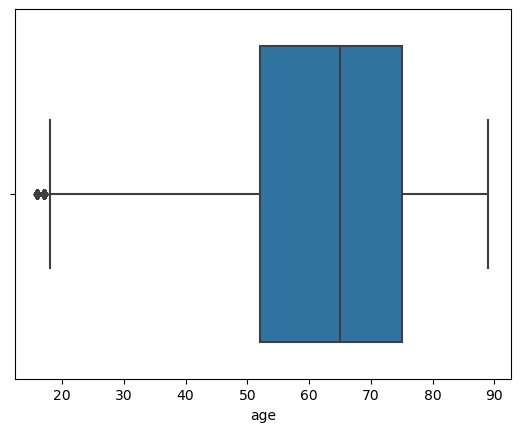

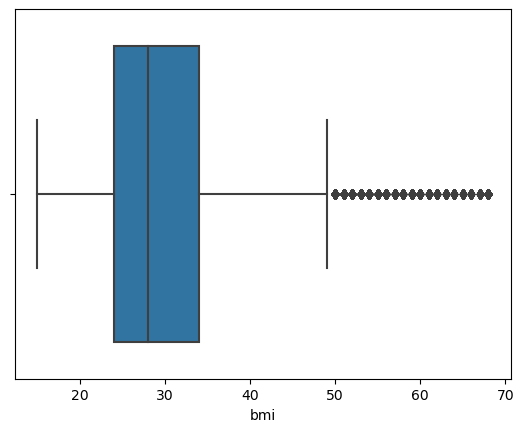

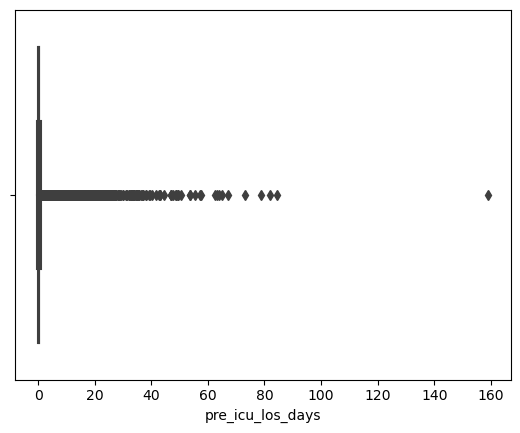

In [8]:
#Continuous: 
#Change bmi to int and round
df['bmi'] = df['bmi'].fillna(999)
df['bmi'] = np.ceil(df['bmi']).astype(int)
df = df[df['bmi'] != 999]

#drop any patients that have age missing
df = df.dropna(subset=['age'])

# print means and SD, box plots
continuous_vars = ['age', 'bmi', 'pre_icu_los_days']
mean_sd = df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)

sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['pre_icu_los_days'])
plt.show()


Mean and Standard Deviation for Continuous Variables:
        age    bmi  pre_icu_los_days
mean  61.99  28.99              0.16
std   16.91   6.71              0.19


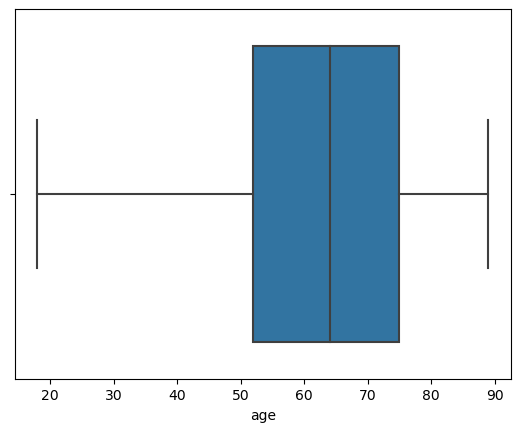

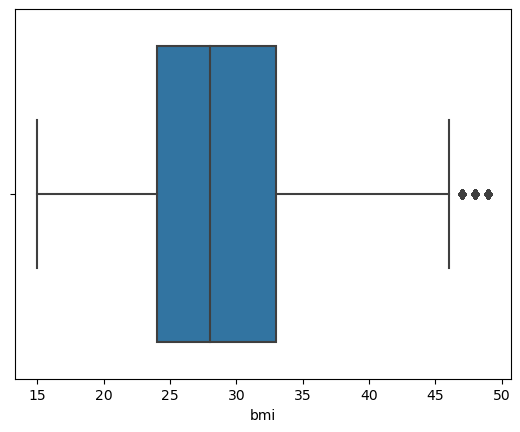

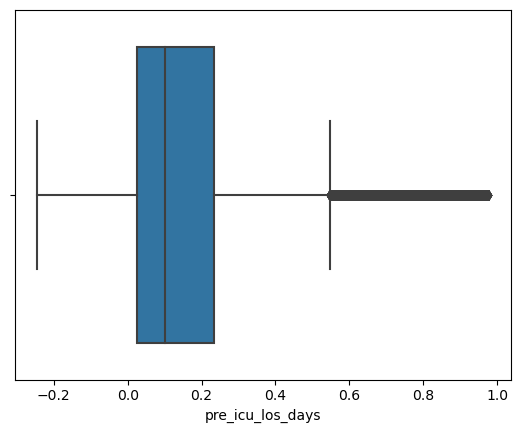

In [9]:
# Calculate the IQR for each variable and drop outliers
for var in continuous_vars:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Drop rows outside the IQR bounds
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

continuous_vars = ['age', 'bmi', 'pre_icu_los_days']
mean_sd = df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)

sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['pre_icu_los_days'])
plt.show()

##### Check multicollinearity

In [10]:
correlation_matrix = df.corr()
print(correlation_matrix)

# sns.pairplot(
#     df[['age', 'bmi','elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', "icu_type", "pre_icu_los_days", 'hospital_death']], 
#     hue='hospital_death', 
#     palette="magma"
# )
# plt.show()

                  patient_id  hospital_id  hospital_death       age       bmi  \
patient_id          1.000000    -0.006912        0.004877  0.000480 -0.002191   
hospital_id        -0.006912     1.000000       -0.000646 -0.006384  0.018192   
hospital_death      0.004877    -0.000646        1.000000  0.103652 -0.039390   
age                 0.000480    -0.006384        0.103652  1.000000 -0.054181   
bmi                -0.002191     0.018192       -0.039390 -0.054181  1.000000   
elective_surgery    0.002493     0.061028       -0.080897  0.064718  0.036454   
ethnicity          -0.002588    -0.040274       -0.007991 -0.135499 -0.005692   
gender             -0.000161    -0.012634        0.001869  0.032300  0.024020   
icu_admit_source    0.002221     0.007568       -0.025872  0.015082  0.025074   
icu_type            0.006948     0.166490        0.010139  0.042359  0.004312   
pre_icu_los_days   -0.006251     0.014331       -0.022599  0.041686  0.008229   
albumin_apache      0.000451

In [11]:
df = df.drop(['albumin_apache', 'hospital_id', 'patient_id'], axis=1)
print(df)

       hospital_death   age  bmi  elective_surgery  ethnicity  gender  \
0                   0  68.0   23                 0          1       1   
1                   0  77.0   28                 0          1       2   
2                   0  25.0   32                 0          1       2   
3                   0  81.0   23                 1          1       2   
5                   0  67.0   28                 0          1       1   
...               ...   ...  ...               ...        ...     ...   
91706               0  54.0   20                 0          5       1   
91708               0  75.0   24                 0          1       1   
91709               0  56.0   48                 0          1       2   
91710               0  48.0   28                 0          1       1   
91712               0  82.0   23                 1          1       2   

       icu_admit_source  icu_type  pre_icu_los_days  
0                     1         1          0.541667  
1              

In [ ]:
#Export final dataset
df.to_csv('final_df_datathon3.csv', index=False)